In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns
from train_test_divide import extract_spammers_scrapers, extract_normal

In [2]:
df_anomaly_train = pd.read_csv('csv_files/train.csv')
df_anomaly_test = pd.read_csv('csv_files/test.csv')

anomaly_inputs = ['request_freq', 'avg_tokens', 'longest_consec', 'var_score', 'sequence_time']
#anomaly_inputs = ['avg_tokens', 'var_score', 'longest_consec']

model_if = IsolationForest(contamination=0.002, random_state=42)
model_if.fit(df_anomaly_train[anomaly_inputs])

c:\Users\vhage\Documents\Skolarbete\Exjobb\request-analyzer-model\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.002, random_state=42)

In [3]:
#Code for checking how many spammers and scarpers that are present in test dataset
df_test = pd.read_csv('csv_files/test.csv')
df_test_spam = extract_spammers_scrapers(df_test)
df_test_spam

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
0,2.036531,2.0,12.0,172.095238,99.790,user-1003
1,2.572653,4.0,6.0,140.971429,126.060,user-1003
2,2.268571,2.0,13.0,149.238095,111.160,user-1003
3,2.132122,2.0,6.0,149.238095,104.474,user-1003
4,2.198367,3.0,10.0,150.685714,107.720,user-1003
...,...,...,...,...,...,...
2672,2.339792,2.0,6.0,146.409524,112.310,user-1004
2673,1.872667,3.0,9.0,168.123810,89.888,user-1004
2674,1.997229,2.0,8.0,157.266667,95.867,user-1004
2675,1.951667,2.0,6.0,151.552381,93.680,user-1004


In [4]:
#Code for checking how many normal users that are present in test dataset
df_test_normal = extract_normal(df_test, df_test_spam)
df_test_normal

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
2677,71.405721,0.545455,4.0,18.257143,3070.446,user-65
2678,535.699978,0.144578,2.0,23.114286,24642.199,user-565
2679,239.164390,0.272727,3.0,22.495238,9805.740,user-842
2680,526.047125,0.112676,3.0,19.123810,21041.885,user-842
2681,477.631550,0.140625,3.0,20.552381,19105.262,user-38
...,...,...,...,...,...,...
3286,454.582722,0.109091,2.0,12.123810,16364.978,user-906
3287,384.681244,0.271186,7.0,32.142857,17310.656,user-990
3288,309.708469,0.269231,3.0,17.457143,15175.715,user-884
3289,242.812396,0.275000,5.0,24.695238,11654.995,user-884


In [5]:
df_anomaly_test['anomaly_score'] = model_if.decision_function(df_anomaly_test[anomaly_inputs])
df_anomaly_test['anomaly'] = model_if.predict(df_anomaly_test[anomaly_inputs])

#This dataframe will only include anomaly score and anomaly label
df_anomaly_score = df_anomaly_test.loc[:,['anomaly_score', 'anomaly']]
df_anomaly_score['user'] = df_anomaly_test['user']
df_a = df_anomaly_score.loc[df_anomaly_score['anomaly']==-1] 
print(df_a)

"""
Test result:
Using all features:
    Sequence length: 15 with 8917 anomalies
        True positives = 2059
        False positives = 4
        True negatives = 1811
        False negatives = 6858

    Sequence length: 25 with 5351 anomalies
        True positives = 2011
        False positives = 11
        True negatives = 1128
        False negatives = 3340

    Sequence length: 35 with 3822 anomalies
        True positives = 2455
        False positives = 0
        True negatives = 835
        False negatives = 1367

    Sequence length: 45 with 2973 anomalies
        True positives = 1972
        False positives = 0
        True negatives = 672
        False negatives = 1001 

    Sequence length: 55 with 2433 anomalies
        True positives = 2246
        False positives = 0
        True negatives = 567
        False negatives = 187        

    Sequence length: 65 with 2060 anomalies
        True positives = 2060
        False positives =  0
        True negatives = 497
        False nagtives = 0   
"""



      anomaly_score  anomaly        user
0         -0.089215       -1   user-1003
1         -0.071857       -1   user-1003
2         -0.062495       -1   user-1003
3         -0.066213       -1   user-1003
4         -0.067359       -1   user-1003
...             ...      ...         ...
1670      -0.070330       -1   user-1004
1671      -0.090258       -1   user-1004
1672      -0.037184       -1   user-1004
1673      -0.076716       -1   user-1004
1695      -0.008824       -1    user-680

[1675 rows x 3 columns]


'\nTest result:\nUsing all features:\n    Sequence length: 15 with 8917 anomalies\n        True positives = 2059\n        False positives = 4\n        True negatives = 1811\n        False negatives = 6858\n\n    Sequence length: 25 with 5351 anomalies\n        True positives = 2011\n        False positives = 11\n        True negatives = 1128\n        False negatives = 3340\n\n    Sequence length: 35 with 3822 anomalies\n        True positives = 2455\n        False positives = 0\n        True negatives = 835\n        False negatives = 1367\n\n    Sequence length: 45 with 2973 anomalies\n        True positives = 1972\n        False positives = 0\n        True negatives = 672\n        False negatives = 1001 \n\n    Sequence length: 55 with 2433 anomalies\n        True positives = 2246\n        False positives = 0\n        True negatives = 567\n        False negatives = 187        \n\n    Sequence length: 65 with 2060 anomalies\n        True positives = 2060\n        False positives =  0\n

In [6]:
#To check which users thar are flagged as anomalies
print(set(df_a['user'].to_list()))
#print(df_anomaly_test.loc[df_anomaly_test['user']== ' user-693'])

{' user-1004', ' user-680', ' user-1005', ' user-1003'}


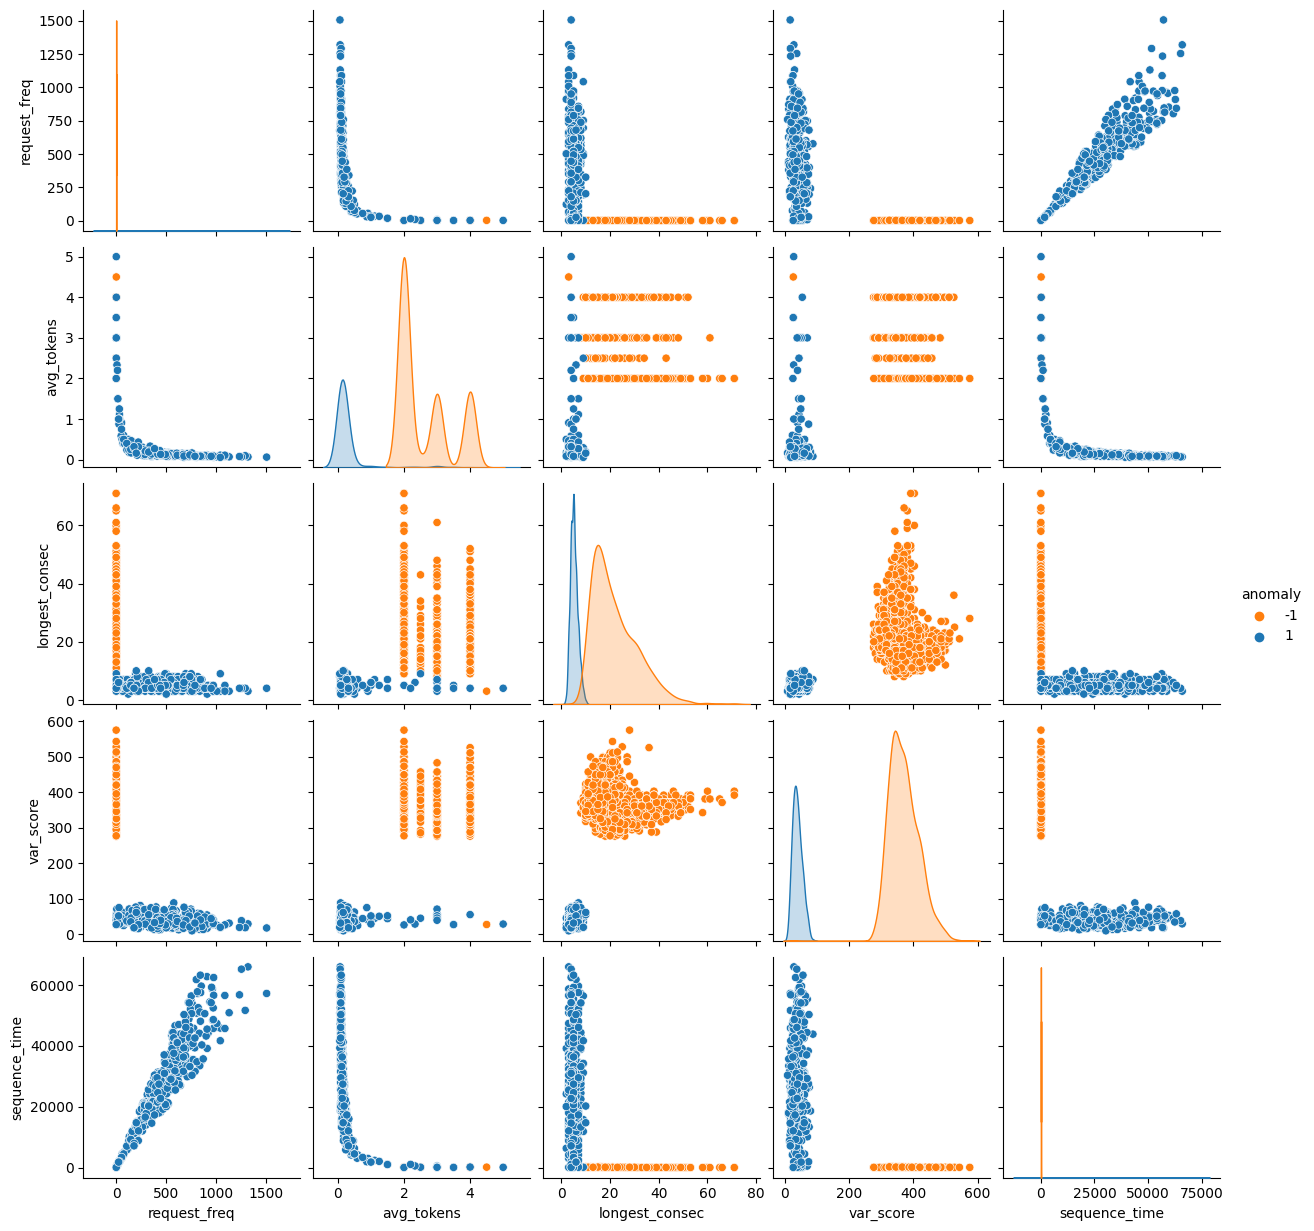

In [7]:
#Plots showcasing the outliers detected by isolation forest
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_anomaly_test, vars=anomaly_inputs, hue='anomaly', palette=palette)